In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os.path as op
import os

bids_folder = '/Users/mrenke/data/ds-dnumrisk'
plot_folder = '/Users/mrenke/data/ds-dnumrisk/plots_and_ims/behavior_risk/' 
sns.set_context('talk')


In [2]:
from utils import get_data

df = get_data()
df['group'] = np.where(df['group'] == 0, 'control', 'dyscalc')
x_var = 'log(risky/safe)'
df = df.sort_index()

#df.head()

number of subjects in dataframe: 66
Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66],
           dtype='int64', name='subject')


/var/folders/3k/8g0xv78x051fznwyh_m5xcn8f91w3q/T/ipykernel_26068/32222344.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.groupby(['subject','group', 'format']).mean()


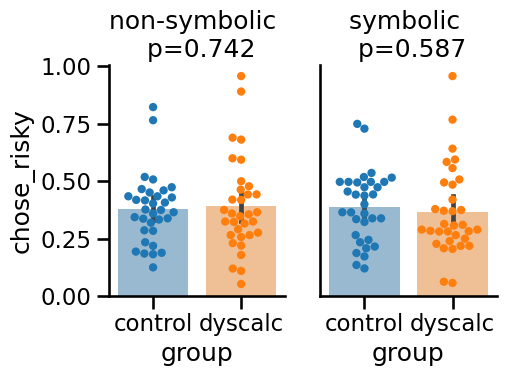

In [5]:
import pingouin as pg

y_var = 'chose_risky'
tmp = df.groupby(['subject','group', 'format']).mean()

x_var_list = tmp.index.unique('format')
fig, ax = plt.subplots(1,len(x_var_list),figsize=(5,3.))

for i,x_var in enumerate(x_var_list):

    filtered_data = tmp.xs(x_var,0,'format').reset_index()

    sns.barplot(ax=ax[i], data=filtered_data, x='group', hue='group', y=y_var, alpha=0.5)
    sns.swarmplot(ax=ax[i], data=filtered_data, x='group',  hue='group', y=y_var, size=6)

    an = pg.anova(data=filtered_data, dv=y_var, between='group')
    p_val = np.round(an['p-unc'][0],3)
    ax[i].set(title=f'{x_var} \n p={p_val}') # ylim=(0.5,1.05),
    if i != 0:
        ax[i].set(ylabel=None, yticks=[])

sns.despine()

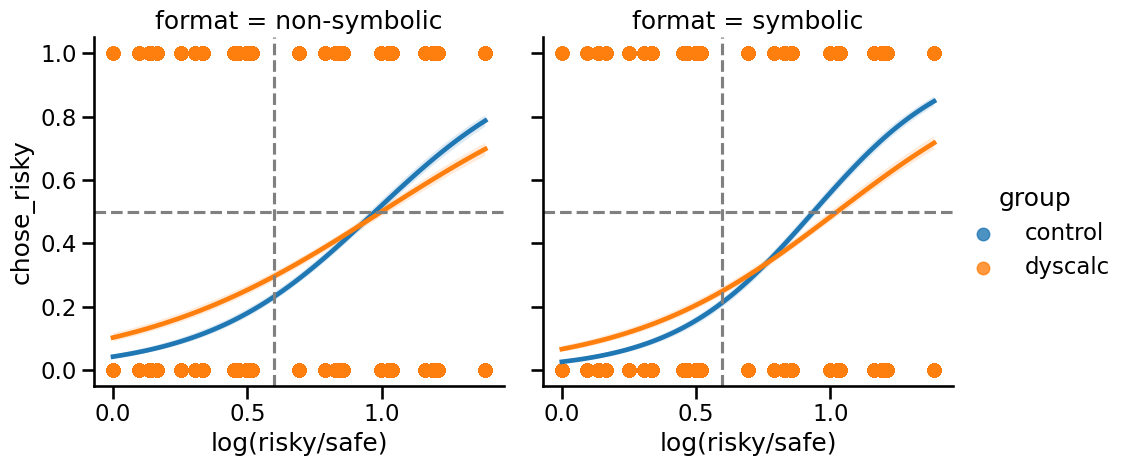

In [10]:
x_var = 'log(risky/safe)'

fig = sns.lmplot(df.reset_index(), x=x_var, y='chose_risky', hue= 'group', col='format',ci=95,  logistic=True)
for ax in fig.axes.flat:
    ax.axvline(x=np.log(1/0.55),color='grey', ls='--')
    ax.axhline(y=0.5,color='grey', ls='--')



/var/folders/3k/8g0xv78x051fznwyh_m5xcn8f91w3q/T/ipykernel_95880/3521164119.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  fig2 = sns.catplot(df.xs('symbolic',0,'format').reset_index(), x=x_var, y='chose_risky', hue='group',ci=95,  kind='point', height=4)


[Text(0.5, 1.0, 'symbolic')]

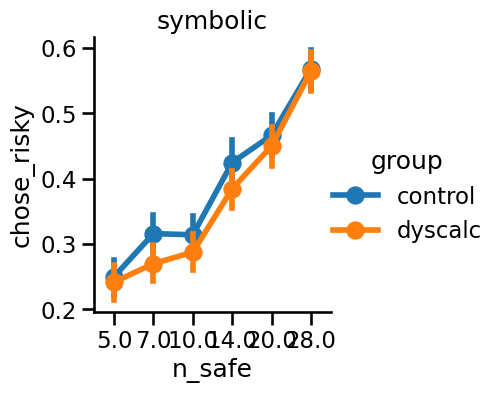

In [6]:
x_var= 'n_safe'

fig2 = sns.catplot(df.xs('symbolic',0,'format').reset_index(), x=x_var, y='chose_risky', hue='group',ci=95,  kind='point', height=4)
fig2.ax.set(title='symbolic')

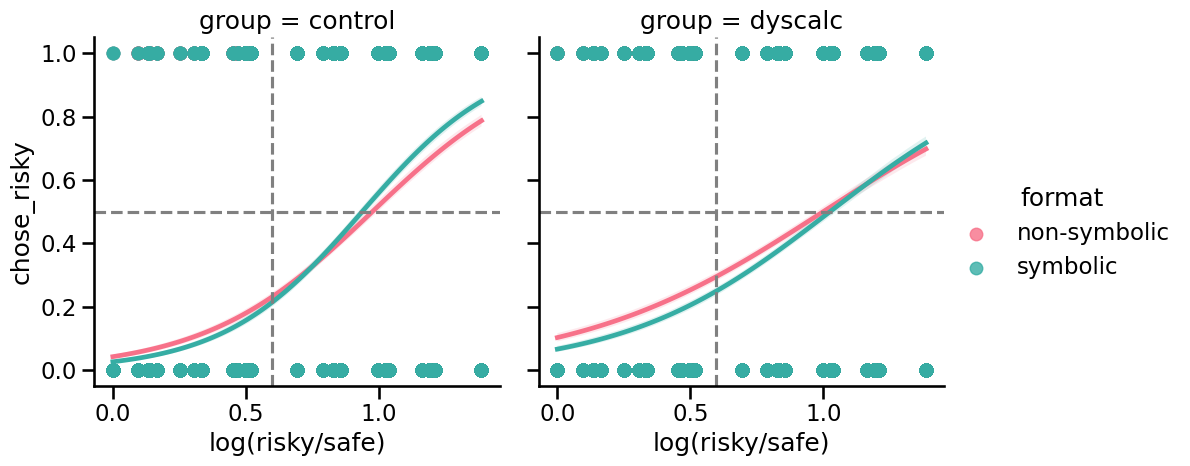

In [11]:

fig2 = sns.lmplot(df.reset_index(), x=x_var, y='chose_risky', hue='format' , col= 'group',ci=95,  logistic=True, palette='husl')
for ax in fig2.axes.flat:
    ax.axvline(x=np.log(1/0.55),color='grey', ls='--')
    ax.axhline(y=0.5,color='grey', ls='--')

### Stake Size effects

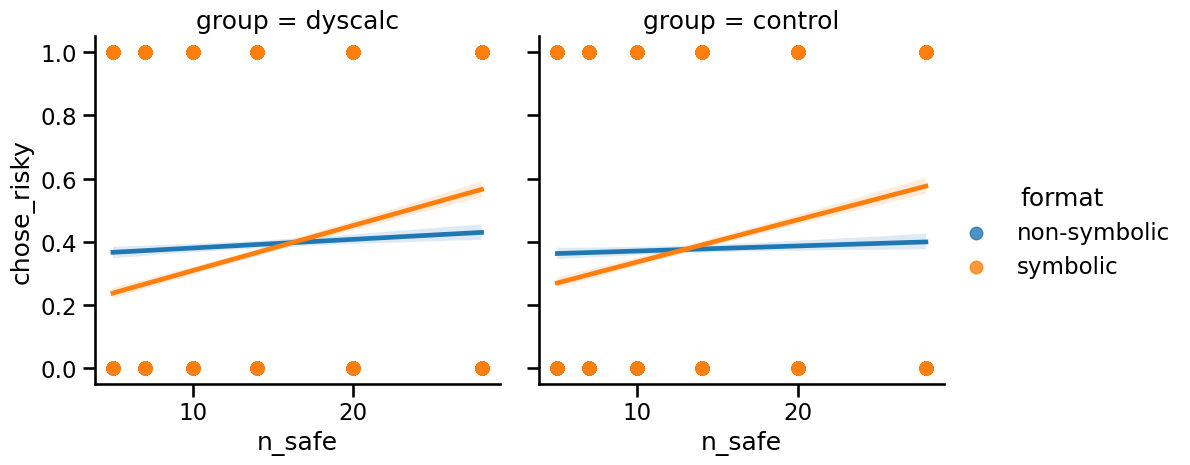

In [12]:

fig = sns.lmplot(df.reset_index(), x='n_safe', y='chose_risky', hue='format', col='group',ci=95)

/var/folders/3k/8g0xv78x051fznwyh_m5xcn8f91w3q/T/ipykernel_26068/978250580.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  fig = sns.catplot(tmp.reset_index(), x='n_safe', y='chose_risky', hue='format', col='group',kind='point', ci=95,palette='husl' )


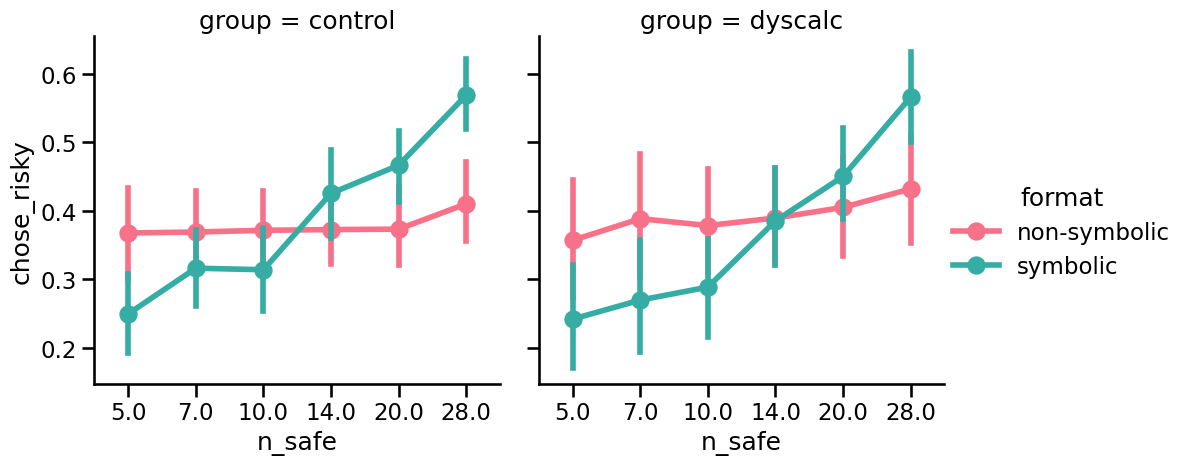

In [12]:
tmp = df.groupby(['subject', 'format', 'n_safe', 'group'])['chose_risky'].mean()

fig = sns.catplot(tmp.reset_index(), x='n_safe', y='chose_risky', hue='format', col='group',kind='point', ci=95,palette='husl' )

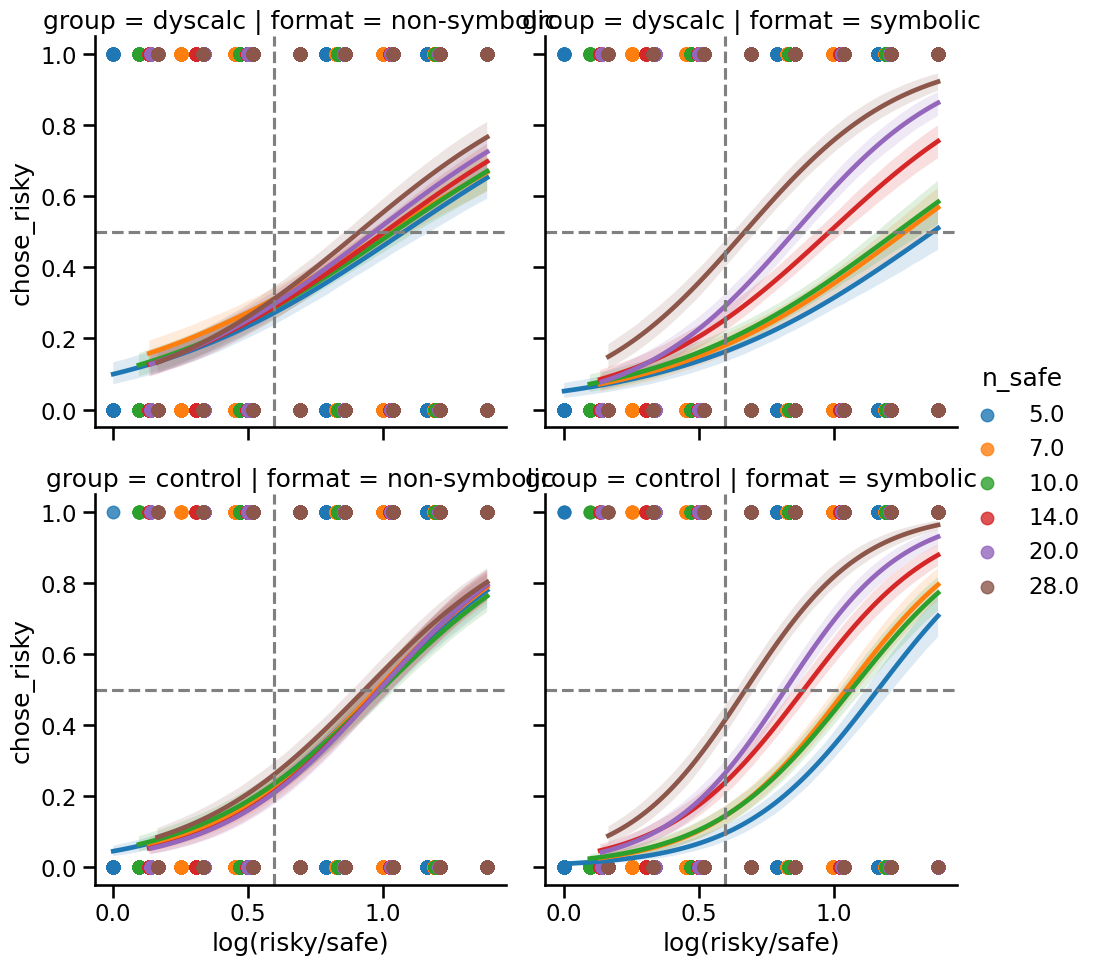

In [11]:
x_var = 'log(risky/safe)'
fig = sns.lmplot(df.reset_index(), x=x_var, y='chose_risky', hue= 'n_safe', col='format',row= 'group', ci=95,  logistic=True)

for ax in fig.axes.flat:
    ax.axvline(x=np.log(1/0.55),color='grey', ls='--')
    ax.axhline(y=0.5,color='grey', ls='--')


## Individual Subjects
### groups separate

In [ ]:
x_var = 'log(risky/safe)'
hue = 'format'

for group in df['group'].unique(): 
    tmp = df[df['group']==group]
    g = sns.lmplot(tmp.reset_index(), x=x_var, y='chose_risky', hue=hue, col='subject',ci=95,  logistic=True, col_wrap=5)

    for ax in g.axes.flat:
        ax.axvline(x=np.log(1/0.55),color='grey', ls='--')
        ax.axhline(y=0.5,color='grey', ls='--')

    g.fig.suptitle('Control', fontsize=20)
    plt.savefig(op.join(plot_folder, f'psymetCurves_{group}.pdf'))


In [33]:
hue = 'n_safe'
x_var = 'log(risky/safe)'

format = 'symbolic' # onnly for symbolic, effects is here much stronger
df_temp = df.xs(format, level='format')

for group in df_temp['group'].unique(): 
    tmp = df_temp[df_temp['group']==group]
    #plt.figure()
    g = sns.lmplot(tmp.reset_index(), x=x_var, y='chose_risky', hue=hue, col='subject',ci=95, col_wrap=5, logistic=True)
    for ax in g.axes.flat:
        ax.axhline(y=0.5,color='grey', ls='--')
    g.fig.suptitle(f'{group}', fontsize=20)
    plt.savefig(op.join(plot_folder, f'chose-riskyONn-safe_{group}_hue-{hue}.pdf'))
    plt.close()

/Users/mrenke/mambaforge/envs/behav_fit2_clone/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/Users/mrenke/mambaforge/envs/behav_fit2_clone/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


### individual stake size effects

In [15]:
for group in df['group'].unique(): 
    tmp = df[df['group']==group]

    g = sns.lmplot(tmp.reset_index(), x='n_safe', y='chose_risky', hue='format', col='subject',ci=95, col_wrap=5)
    for ax in g.axes.flat:
        ax.axhline(y=0.5,color='grey', ls='--')
    g.fig.suptitle(f'{group}', fontsize=20)
    plt.savefig(op.join(plot_folder, f'chose-riskyONn-safe_{group}.pdf'))
    plt.close()

In [23]:
for group in df['group'].unique(): 
    tmp = df[df['group']==group]
    tmp = tmp.groupby(['subject', 'format', 'n_safe'])['chose_risky'].mean()

    g = sns.lmplot(tmp.reset_index(), x='n_safe', y='chose_risky', hue='format', col='subject',ci=95, col_wrap=5)
    for ax in g.axes.flat:
        ax.axhline(y=0.5,color='grey', ls='--')
    g.fig.suptitle(f'{group}', fontsize=20)
    plt.savefig(op.join(plot_folder, f'chose-riskyONn-safe_meaned_{group}.pdf'))
    plt.close()

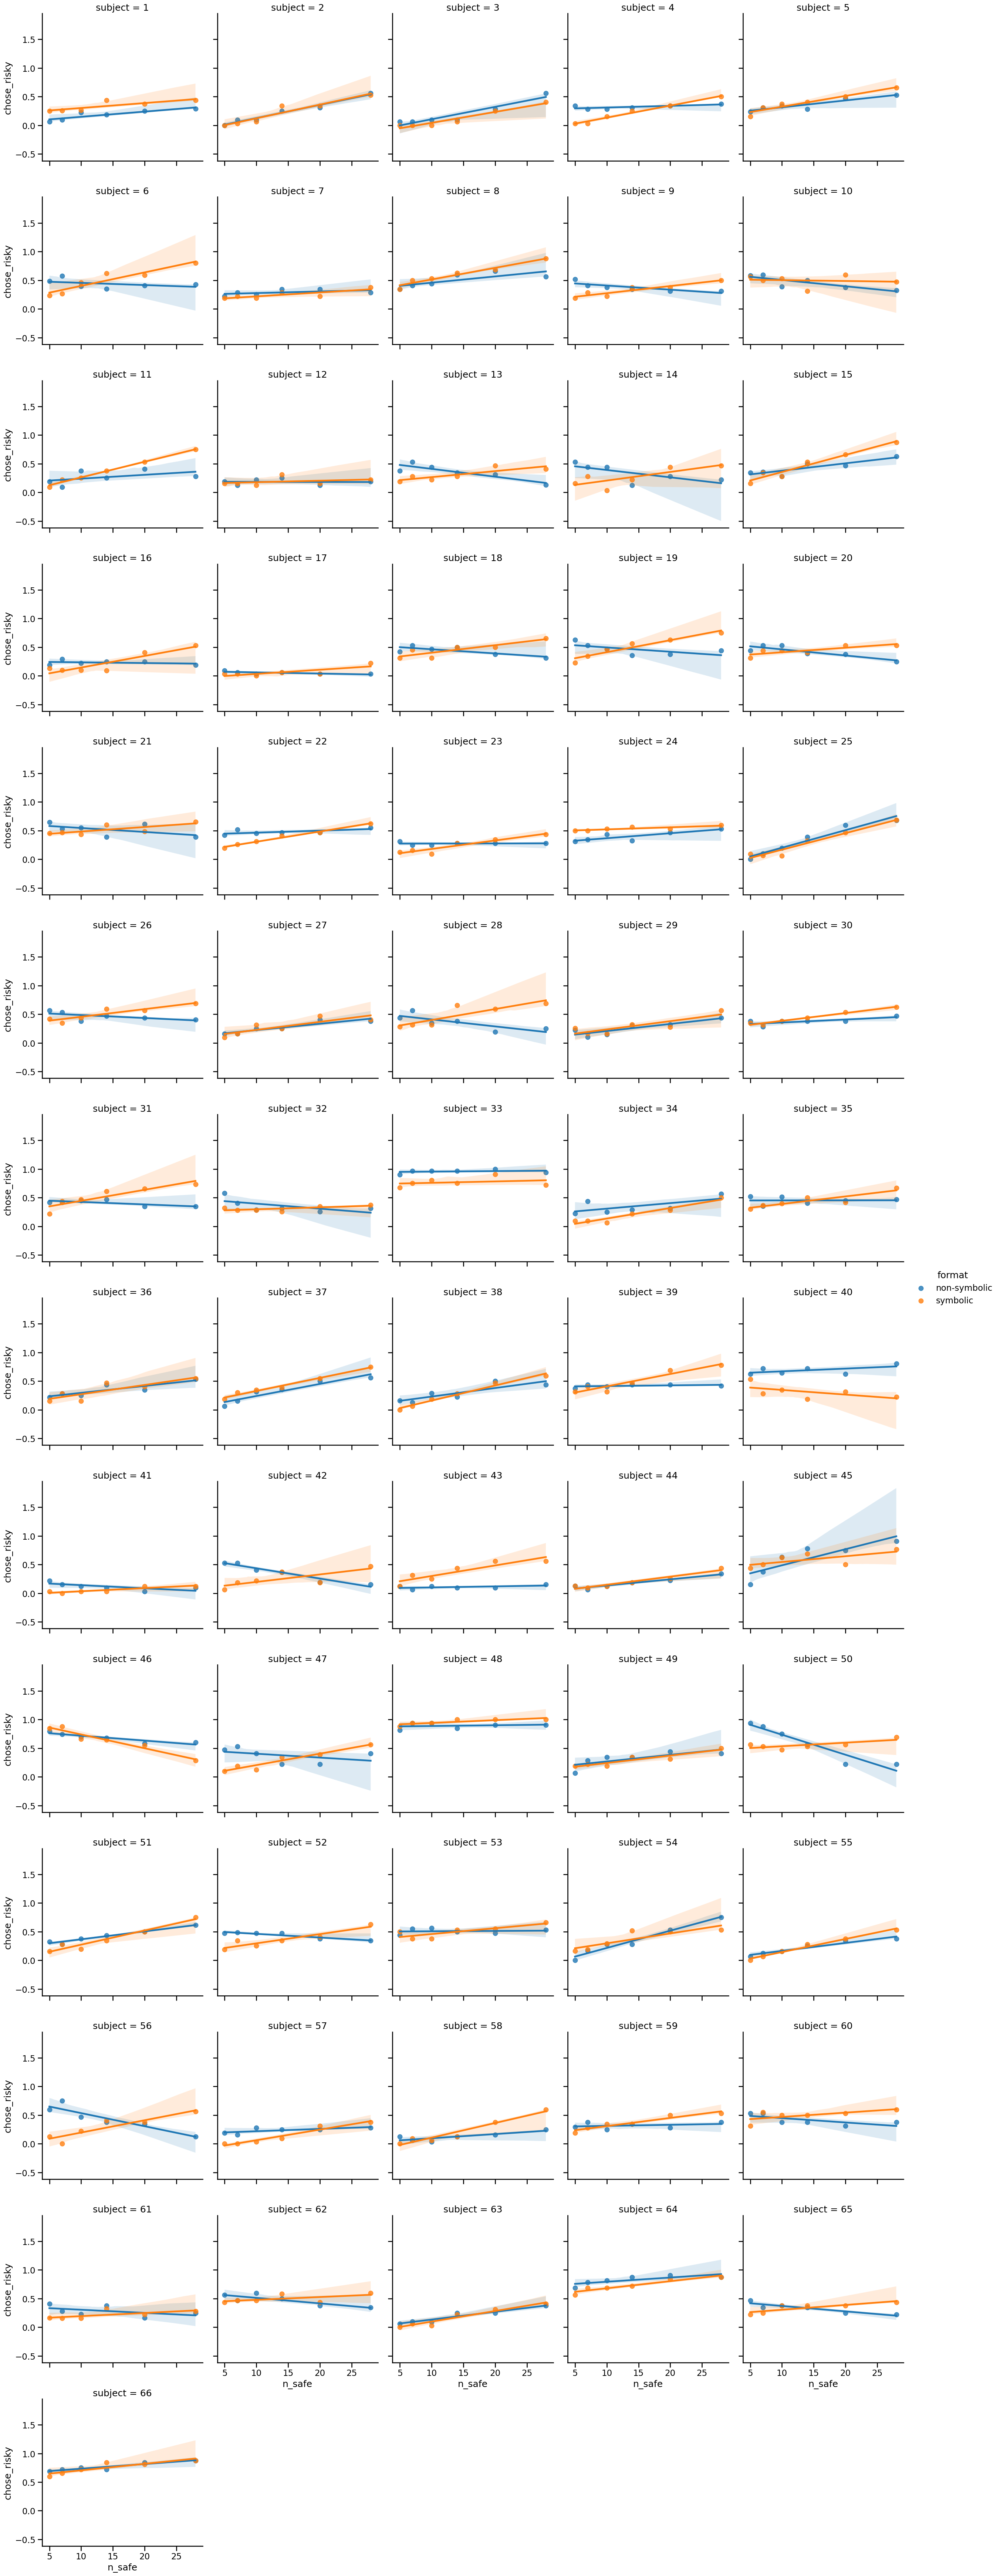

In [22]:
g = sns.lmplot(tmp.reset_index(), x='n_safe', y='chose_risky', hue='format', col='subject',ci=95, col_wrap=5)


Text(0.5, 0.98, 'outliers, non-symbolic')

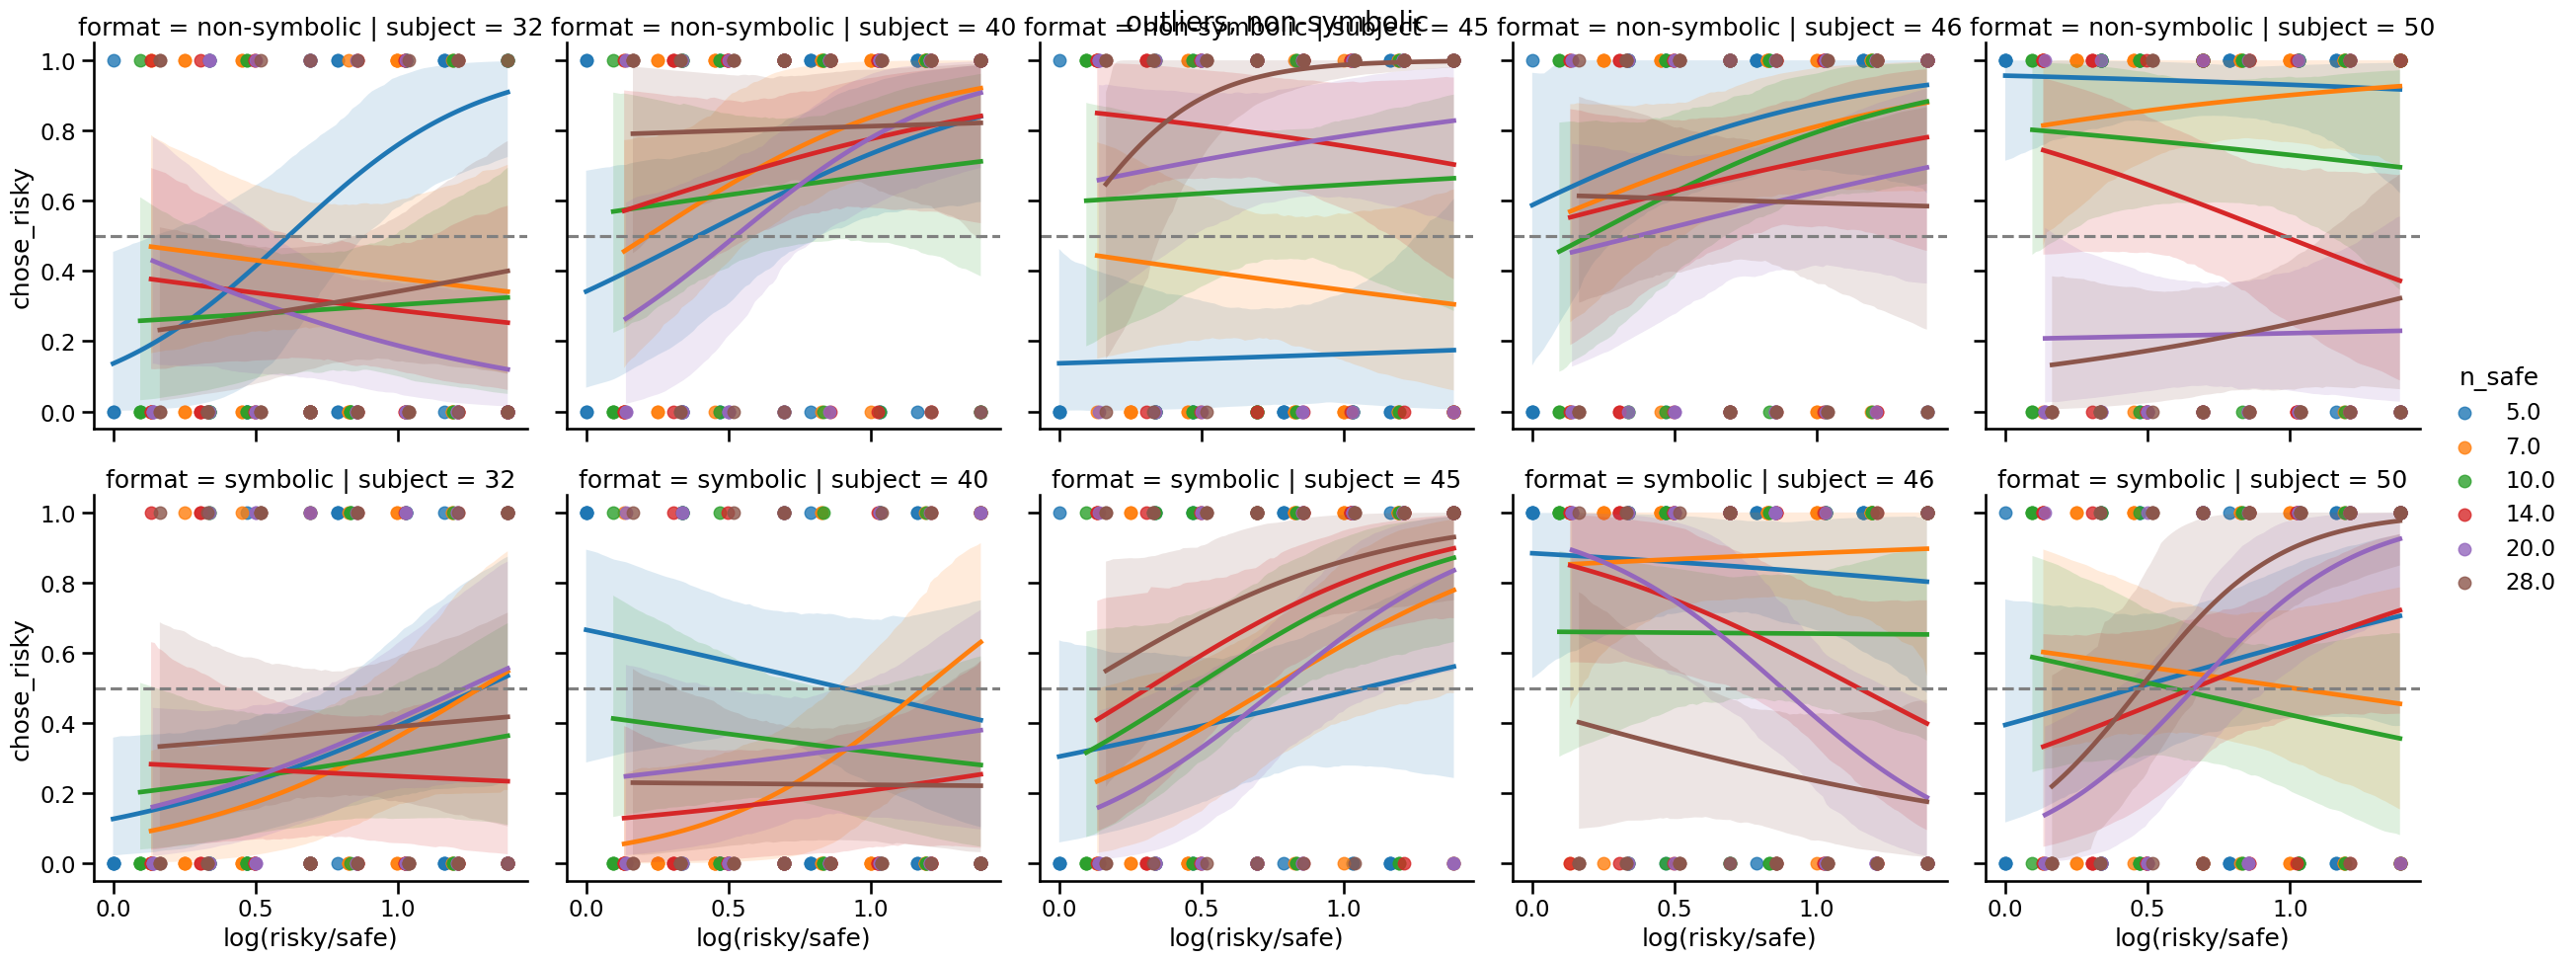

In [5]:
hue = 'n_safe'
x_var = 'log(risky/safe)'

format = 'non-symbolic' # onnly for symbolic, effects is here much stronger
#df_temp = df.xs(format, level='format')
df_temp = df

subList_remove = [32,40,45,46,50]
df_fil = df_temp.loc[df_temp.index.get_level_values('subject').isin(subList_remove)] # only 10 subs to check model fitting

tmp = df_fil
g = sns.lmplot(tmp.reset_index(), x=x_var, y='chose_risky', hue=hue, col='subject',ci=95, logistic=True, row='format')
for ax in g.axes.flat:
    ax.axhline(y=0.5,color='grey', ls='--')
g.fig.suptitle(f'outliers, {format}', fontsize=20)
#plt.savefig(op.join(plot_folder, f'chose-riskyONn-safe_{group}_hue-{hue}.pdf'))
